In [1]:
import pandas as pd
import numpy as np
import sklearn
import statsmodels as sm

In [2]:
#Upload the data set from the local machine
Max_Temp_df = pd.read_csv("C:/Users/kunku/OneDrive/Documents/Book Revision/Max_Temp.csv", sep=",", header=0)
Max_Temp_df.head(5)

,Date,Temp
0,2018-01-01,23.83
1,2018-01-02,25.97
2,2018-01-03,28.95
3,2018-01-04,32.74
4,2018-01-05,33.77


In [3]:
#get full information on Max Temp dataframe
Max_Temp_df.info()
Max_Temp_df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    36 non-null     object 
 1   Temp    36 non-null     float64
dtypes: float64(1), object(1)
memory usage: 704.0+ bytes


,Date,Temp
0,2018-01-01,23.83
1,2018-01-02,25.97
2,2018-01-03,28.95
3,2018-01-04,32.74
4,2018-01-05,33.77
5,2018-01-06,34.15
6,2018-01-07,31.85
7,2018-01-08,31.32
8,2018-01-09,30.68
9,2018-01-10,30.29


In [5]:
#Date is currently recognized as text data by
#Python. Hence, will be converted to the 
#standard data format recognized by Python
#using the pandas function to_datetime()
Max_Temp_df.Date = pd.to_datetime(Max_Temp_df.Date)
Max_Temp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    36 non-null     datetime64[ns]
 1   Temp    36 non-null     float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 704.0 bytes


<AxesSubplot:>

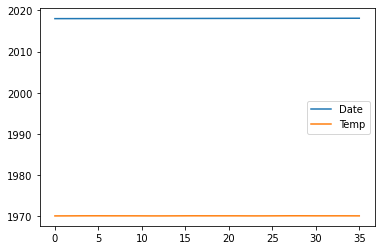

In [7]:
import matplotlib.pyplot as plt
Max_Temp_df.plot()

In [8]:
#indexing the dataframe on Date field so that
#further operations on the data can be done easily
Max_Temp_df.set_index("Date", inplace=True)

In [9]:
Max_Temp_df.info()
Max_Temp_df

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 36 entries, 2018-01-01 to 2018-02-05
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Temp    36 non-null     float64
dtypes: float64(1)
memory usage: 576.0 bytes


,Temp
Date,
2018-01-01,23.83
2018-01-02,25.97
2018-01-03,28.95
2018-01-04,32.74
2018-01-05,33.77
2018-01-06,34.15
2018-01-07,31.85
2018-01-08,31.32
2018-01-09,30.68


<AxesSubplot:xlabel='Date'>

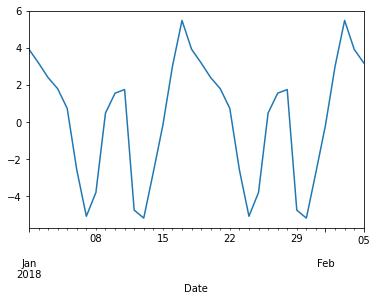

In [10]:
#Citation: Seabold, Skipper, and Josef Perktold. “statsmodels: Econometric 
#and statistical modeling with python.” Proceedings of the 9th 
#Python in Science Conference. 2010. Thanks to them for the
#excellent contribution to the society
#Now, we will use the statsmodels tool to carryout the
#time series decomposition into seasonal, trend, residual/
#irregular/noise/error components
from statsmodels.tsa.api import seasonal_decompose
from statsmodels.tools.eval_measures import rmspe, rmse
decomp = seasonal_decompose(Max_Temp_df, model="additive", period=17)
#Let us look at the seasonal plot
decomp.seasonal.plot()

<AxesSubplot:xlabel='Date'>

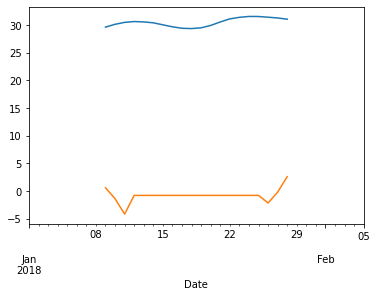

In [11]:
#let us now look at the trend and residual plot
decomp.trend.plot()
decomp.resid.plot()

In [12]:
#Check if the time series is stationary
#otherwise we have to make it stationary
#To understand it we run Augmented Dickey-Fuller
#Test
import pmdarima
from pmdarima.arima import ADFTest
ADF_Test_Res = ADFTest(alpha=0.05)
ADF_Test_Res.should_diff(Max_Temp_df)

(0.2878609512711282, True)

In [13]:
#as the p-value is non-significant we cannot reject the
#null hypothesis that the time series is not stationary
#We need to difference the time series to make it 
#stationary
Max_Temp_df['Diff_1']=Max_Temp_df["Temp"].diff()
Max_Temp_df['Diff_2']=Max_Temp_df["Temp"].diff(periods=2)
Max_Temp_df['Diff_3']=Max_Temp_df["Temp"].diff(periods=3)
Max_Temp_df

,Temp,Diff_1,Diff_2,Diff_3
Date,,,,
2018-01-01,23.83,NaN,NaN,NaN
2018-01-02,25.97,2.14,NaN,NaN
2018-01-03,28.95,2.98,5.12,NaN
2018-01-04,32.74,3.79,6.77,8.91
2018-01-05,33.77,1.03,4.82,7.80
2018-01-06,34.15,0.38,1.41,5.20
2018-01-07,31.85,-2.30,-1.92,-0.89
2018-01-08,31.32,-0.53,-2.83,-2.45
2018-01-09,30.68,-0.64,-1.17,-3.47


In [14]:
Max_Temp_df.drop("Temp", inplace=True, axis=1)
Max_Temp_df.drop("Diff_1", inplace=True, axis=1)
Max_Temp_df.drop("Diff_2", inplace=True, axis=1)

In [15]:
#deleting the NaN valued rows
Max_Temp_df = Max_Temp_df.dropna()
Max_Temp_df

,Diff_3
Date,
2018-01-04,8.91
2018-01-05,7.80
2018-01-06,5.20
2018-01-07,-0.89
2018-01-08,-2.45
2018-01-09,-3.47
2018-01-10,-1.56
2018-01-11,-3.27
2018-01-12,-5.60


In [16]:
#Check if the time series is stationary
#otherwise we have to make it stationary
#To understand it we run Augmented Dickey-Fuller
#Test
import pmdarima
from pmdarima.arima import ADFTest
ADF_Test_Res = ADFTest(alpha=0.05)
ADF_Test_Res.should_diff(Max_Temp_df)

(0.6021264806877321, True)

In [17]:
#Caution: Even though we have not yet made the
#time series stationary, we are going ahead with
#the model building activity
#Now let us go ahead and build the ARIMA models
#again using the statsmodels tool and others
#Among ARIMA we will use the auto_arima
import pmdarima
from pmdarima.arima import auto_arima
arima_model_01 = auto_arima(Max_Temp_df)
arima_results_01 = arima_model_01.fit(Max_Temp_df)

In [18]:
print(arima_results_01)

 ARIMA(2,0,0)(0,0,0)[0]          


In [19]:
arima_model_01.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   33
Model:               SARIMAX(2, 0, 0)   Log Likelihood                 -68.782
Date:                Thu, 01 Sep 2022   AIC                            143.563
Time:                        22:07:35   BIC                            148.053
Sample:                    01-04-2018   HQIC                           145.074
                         - 02-05-2018                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.3538      0.126     10.784      0.000       1.108       1.600
ar.L2         -0.7817      0.098     -7.961      0.000      -0.974      -0.589
sigma2         3.4812      0.984      3.538      0.000       1.552       5.410
===================================================================================
Ljung-Box (L1) (Q):                   0.36   Jarque-Bera (JB):                 0.98
Prob(Q):                              0.55   Prob(JB):                         0.61
Heteroskedasticity (H):               0.58   Skew:                            -0.39
Prob(H) (two-sided):                  0.38   Kurtosis:                         2.66
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [20]:
Max_Temp_test_data = pd.read_csv("C:/Users/kunku/OneDrive/Documents/Book Revision/Max_Temp_Test1.csv", header=0)
Max_Temp_test_data.head(5)

,Date,Diff_3
0,2018-02-06,-2.21
1,2018-02-07,0.65
2,2018-02-08,-3.49
3,2018-02-09,-8.50
4,2018-02-10,-6.38


In [21]:
Max_Temp_test_data.Date = pd.to_datetime(Max_Temp_test_data.Date)
Max_Temp_test_data.set_index("Date", inplace=True)

In [22]:
Max_Temp_test_data.head(5)

,Diff_3
Date,
2018-02-06,-2.21
2018-02-07,0.65
2018-02-08,-3.49
2018-02-09,-8.50
2018-02-10,-6.38


In [23]:
#Now we will do the Forecasting i.e. the prediction
forecasting = pd.DataFrame(arima_model_01.predict(n_periods=12),index=Max_Temp_test_data.index)
forecasting.columns = ["Diff_3"]
forecasting

,Diff_3
Date,
2018-02-06,-3.492774
2018-02-07,-1.953601
2018-02-08,0.085386
2018-02-09,1.642643
2018-02-10,2.157053
2018-02-11,1.636215
2018-02-12,0.529016
2018-02-13,-0.562783
2018-02-14,-1.175400
